##### Autism Prediction, Juan Garcia, CISA 4358: 001, Senior Project and Seminar, Fall 2022 ##### 

### Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import *
from sklearn.feature_selection import *
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
import warnings
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [2]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000

### Import CSV

In [3]:
autism_df = pd.read_csv("train.csv")
autism_df.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,...,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
6,7,1,0,0,0,0,0,1,1,1,...,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,...,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
8,9,1,1,1,1,0,0,0,1,1,...,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0
9,10,0,0,0,0,0,0,0,1,0,...,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0


In [4]:
print(autism_df.shape)

(800, 22)


### Unique Values

In [5]:
for columns in autism_df.select_dtypes('O').columns:
    print(f'Column name: {columns}\n')
    print(f'Unique values:\n{autism_df[columns].unique()}\n\n')

Column name: gender

Unique values:
['f' 'm']


Column name: ethnicity

Unique values:
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


Column name: jaundice

Unique values:
['no' 'yes']


Column name: austim

Unique values:
['no' 'yes']


Column name: contry_of_res

Unique values:
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']


Column n

### Combining Like Terms

In [6]:
autism_df['ethnicity'] = autism_df['ethnicity'].replace('?', 'Others')
autism_df['ethnicity'] = autism_df['ethnicity'].replace('others', 'Others')
autism_df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

### Dropping Unused Columns

In [7]:
autism_df = autism_df.drop({"ID","age_desc","used_app_before","relation"}, axis = 1)
autism_df.ethnicity.fillna("Unknown", inplace = True)

autism_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,6.351166,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,2.255185,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,2.276617,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,-4.777286,0


### Null Values

In [8]:
print(autism_df.isnull().sum(axis = 0))

A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
gender           0
ethnicity        0
jaundice         0
austim           0
contry_of_res    0
result           0
Class/ASD        0
dtype: int64


### Value Counts Attributes

In [9]:
count1 = autism_df['contry_of_res'].value_counts()
count2 = autism_df['jaundice'].value_counts()
count3 = autism_df['ethnicity'].value_counts()
count4 = autism_df['gender'].value_counts()
count5 = autism_df['austim'].value_counts()
count6 = autism_df['Class/ASD'].value_counts()
print('_________________')
print(count1)
print('_________________')
print(count2)
print('_________________')
print(count3)
print('_________________')
print(count4)
print('_________________')
print(count5)
print('_________________')
print(count6)

_________________
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Italy                     6
Bahamas                   6
Malaysia                  6
Viet Nam                  5
Pakistan                  4
China                     4
Mexico                    4
Nicaragua                 4
Armenia                   4
Azerbaijan                4
Iraq                      4
Aruba                     4
Saudi Arabia              4
AmericanSamoa             4
Bolivia                   3
Se

### ASD Distribution per Countries

In [10]:
country_df = pd.DataFrame(count1)
country_df.reset_index(inplace=True)
country_df.rename(columns = {'contry_of_res':'Total Cases','index':'Country'}, inplace = True)
country_df

,Country,Total Cases
0,United States,134
1,India,108
2,New Zealand,78
3,United Kingdom,67
4,Jordan,55
5,United Arab Emirates,40
6,Australia,37
7,Canada,30
8,Afghanistan,22
9,Netherlands,20


<AxesSubplot: xlabel='Country'>

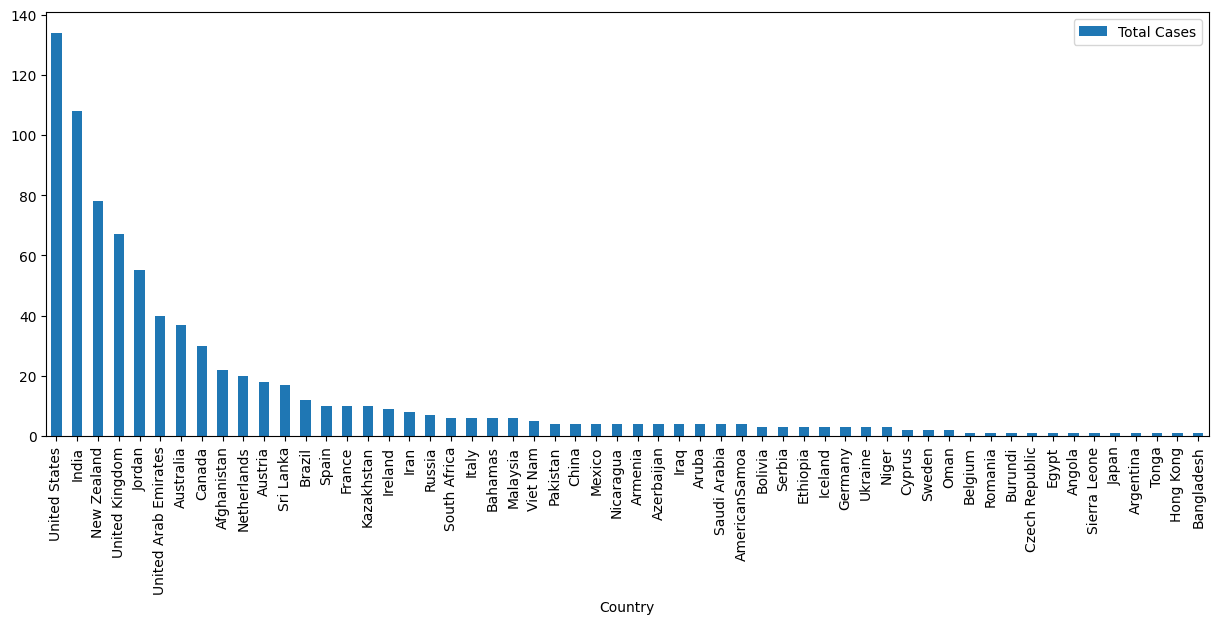

In [11]:
plt.rcParams["figure.figsize"] = (15,5.5)
country_df.plot.bar('Country', 'Total Cases')

### Counting the Total Raw Score

In [12]:
count1 = autism_df['A1_Score'].value_counts()
print(count1)
count2 = autism_df['A2_Score'].value_counts()
print(count2)
count3 = autism_df['A3_Score'].value_counts()
print(count3)
count4 = autism_df['A4_Score'].value_counts()
print(count4)
count5 = autism_df['A5_Score'].value_counts()
print(count5)
count6 = autism_df['A6_Score'].value_counts()
print(count6)
count7 = autism_df['A7_Score'].value_counts()
print(count7)
count8 = autism_df['A8_Score'].value_counts()
print(count8)
count9 = autism_df['A9_Score'].value_counts()
print(count9)
count10 = autism_df['A10_Score'].value_counts()
print(count10)

1    448
0    352
Name: A1_Score, dtype: int64
1    424
0    376
Name: A2_Score, dtype: int64
0    440
1    360
Name: A3_Score, dtype: int64
0    468
1    332
Name: A4_Score, dtype: int64
0    484
1    316
Name: A5_Score, dtype: int64
0    557
1    243
Name: A6_Score, dtype: int64
0    482
1    318
Name: A7_Score, dtype: int64
1    407
0    393
Name: A8_Score, dtype: int64
0    404
1    396
Name: A9_Score, dtype: int64
1    494
0    306
Name: A10_Score, dtype: int64


In [13]:
scores_df = autism_df[['A1_Score',
               'A2_Score',
               'A3_Score',
               'A4_Score',
               'A5_Score',
               'A6_Score',
               'A7_Score',
               'A8_Score',
               'A9_Score',
               'A10_Score']]
scores_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,0,1,0,1,0,1,0,1,1
1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


### Correlation in the Scores DF

In [14]:
scores_df.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
A1_Score,1.000000,0.401419,0.493016,0.383718,0.432912,0.371917,0.447262,0.191815,0.439397,0.390478
A2_Score,0.401419,1.000000,0.489330,0.488173,0.427895,0.447721,0.452713,0.302040,0.511547,0.454422
A3_Score,0.493016,0.489330,1.000000,0.558896,0.579769,0.511669,0.559118,0.315882,0.597022,0.510276
A4_Score,0.383718,0.488173,0.558896,1.000000,0.559748,0.563543,0.554838,0.360781,0.576723,0.506292
A5_Score,0.432912,0.427895,0.579769,0.559748,1.000000,0.494944,0.550663,0.292747,0.524624,0.436010
A6_Score,0.371917,0.447721,0.511669,0.563543,0.494944,1.000000,0.496588,0.333694,0.536666,0.419172
A7_Score,0.447262,0.452713,0.559118,0.554838,0.550663,0.496588,1.000000,0.271903,0.539433,0.455326
A8_Score,0.191815,0.302040,0.315882,0.360781,0.292747,0.333694,0.271903,1.000000,0.352747,0.250438
A9_Score,0.439397,0.511547,0.597022,0.576723,0.524624,0.536666,0.539433,0.352747,1.000000,0.485983
A10_Score,0.390478,0.454422,0.510276,0.506292,0.436010,0.419172,0.455326,0.250438,0.485983,1.000000


<AxesSubplot: >

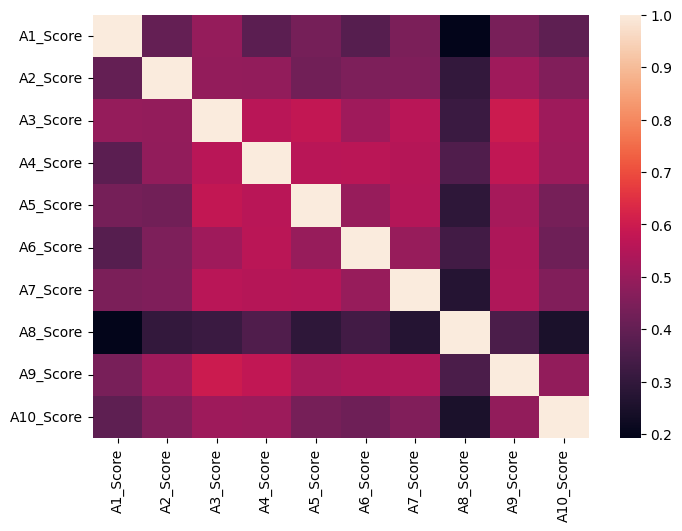

In [15]:
plt.rcParams["figure.figsize"] = (8,5.5)
sns.heatmap(scores_df.corr())


In [16]:
print(scores_df.isnull().sum(axis = 0))

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
dtype: int64


In [17]:
scores_df.dtypes

A1_Score     int64
A2_Score     int64
A3_Score     int64
A4_Score     int64
A5_Score     int64
A6_Score     int64
A7_Score     int64
A8_Score     int64
A9_Score     int64
A10_Score    int64
dtype: object

### Adding up the scores

In [18]:
sum_score = pd.DataFrame(columns=['raw_score'])
sums = []

for index in range(len(scores_df.index)):
    row = scores_df.iloc[[index]]

    sum = int(row['A1_Score'])+ int(row['A2_Score'])+ int(row['A3_Score'])+ int(row['A4_Score'])+ int(row['A5_Score'])+ int(row['A6_Score'])+ int(row['A7_Score'])+ int(row['A8_Score'])+ int(row['A9_Score'])+ int(row['A10_Score'])
    sums.append(sum)

    sum_score.loc[index] = [sum]

In [19]:
#adding the raw score to df
autism_new = pd.concat([autism_df, sum_score], axis=1)
autism_new.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD,raw_score
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,6.351166,0,6
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,2.255185,0,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,14.851484,1,10
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,2.276617,0,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,-4.777286,0,0


### Subtracting Result from Raw Score

In [20]:
diff_score = pd.DataFrame(columns=['diff_score'])

for index in range(len(autism_new.index)):
    row = autism_new.iloc[[index]]

    diff = float(row['result'])- int(row['raw_score'])
    diff_score.loc[index] = [diff]
    
print(diff_score)

     diff_score
0      0.351166
1      2.255185
2      4.851484
3      2.276617
4     -4.777286
5      5.562117
6      3.984569
7      4.237898
8     -8.755774
9     12.922570
10     4.839255
11     6.730771
12    -1.218223
13     6.449159
14     9.798030
15     2.778929
16     3.495260
17    -7.095811
18    -4.867772
19     2.286905
20     4.995403
21     5.917927
22     0.094296
23     4.686719
24     4.823938
25    -1.595701
26     2.055675
27    -2.612312
28    -0.387512
29     5.770715
30     7.189531
31     0.412387
32     1.405741
33     2.647281
34     9.650866
35     6.112454
36     3.056010
37     4.832674
38     3.409354
39     3.451322
40     3.346515
41    -1.612008
42     4.064242
43     6.078623
44     5.165910
45     1.903541
46    -1.148262
47     4.761784
48     4.512264
49    11.983391
50     5.164184
51    -0.505289
52     3.920188
53     9.061898
54     0.264860
55    -1.458509
56     3.965200
57    -2.397522
58     4.248683
59     3.631819
60    12.371113
61     2

In [21]:
#turning the negatives into positives
pos_diff_score = pd.DataFrame(columns=['diff_score'])
low = diff_score.iloc[[215]]

for index in range(len(diff_score.index) - 1):
    row = diff_score.iloc[[index]]
    pos_diff_score.loc[len(pos_diff_score.index)] = [float(row['diff_score']) - float(low['diff_score'])]
pos_diff_score.head()

,diff_score
0,10.524664
1,12.428683
2,15.024982
3,12.450115
4,5.396212


### Creating a New DF with new attributes

In [22]:
new_df = pd.concat([autism_new, pos_diff_score], axis=1)
new_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD,raw_score,diff_score
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,6.351166,0,6,10.524664
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,2.255185,0,0,12.428683
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,14.851484,1,10,15.024982
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,2.276617,0,0,12.450115
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,-4.777286,0,0,5.396212


In [23]:
new_df = new_df.drop(["raw_score","A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score","result"], axis = 1)
new_df.head()

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
0,38.172746,f,Others,no,no,Austria,0,10.524664
1,47.750517,m,Others,no,no,India,0,12.428683
2,7.380373,m,White-European,no,yes,United States,1,15.024982
3,23.561927,f,Others,no,no,United States,0,12.450115
4,43.205790,m,Others,no,no,South Africa,0,5.396212


In [24]:
new_df = new_df.dropna()

In [25]:
new_df[new_df.isna().any(axis=1)]

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score


In [26]:
new_df.dtypes

age              float64
gender            object
ethnicity         object
jaundice          object
austim            object
contry_of_res     object
Class/ASD          int64
diff_score       float64
dtype: object

In [27]:
new_df.head()

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
0,38.172746,f,Others,no,no,Austria,0,10.524664
1,47.750517,m,Others,no,no,India,0,12.428683
2,7.380373,m,White-European,no,yes,United States,1,15.024982
3,23.561927,f,Others,no,no,United States,0,12.450115
4,43.205790,m,Others,no,no,South Africa,0,5.396212


### Encoding the New DF

In [28]:
le = LabelEncoder()
for columns in new_df.columns:
    if new_df[columns].dtype == object:
        new_df[columns] = le.fit_transform(new_df[columns])       
new_df.sample(10)

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
34,22.469841,1,0,0,0,13,0,19.824364
495,22.468683,1,5,1,0,25,0,8.303619
733,22.712578,1,7,0,0,21,1,17.089319
199,18.236685,1,9,1,0,52,0,17.551105
33,67.008192,1,9,1,0,36,0,12.820779
145,55.185770,0,9,1,1,35,1,16.846024
320,77.149980,1,9,0,0,6,0,4.205280
739,9.552792,1,9,1,1,0,1,15.017148
780,23.512162,1,2,0,0,54,1,14.394402
744,7.180865,0,5,1,0,48,0,21.923833


### New Correlations in the DF

In [29]:
new_df.corr()

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
age,1.000000,-0.038435,0.044523,-0.019871,0.048664,-0.014873,0.110679,-0.329448
gender,-0.038435,1.000000,-0.035092,-0.004495,0.015050,-0.070691,-0.005256,0.062027
ethnicity,0.044523,-0.035092,1.000000,0.169727,0.218093,0.143285,0.364329,-0.041314
jaundice,-0.019871,-0.004495,0.169727,1.000000,0.109539,0.004709,0.138487,-0.019422
austim,0.048664,0.015050,0.218093,0.109539,1.000000,0.203723,0.359040,-0.085897
contry_of_res,-0.014873,-0.070691,0.143285,0.004709,0.203723,1.000000,0.214441,-0.018086
Class/ASD,0.110679,-0.005256,0.364329,0.138487,0.359040,0.214441,1.000000,-0.088146
diff_score,-0.329448,0.062027,-0.041314,-0.019422,-0.085897,-0.018086,-0.088146,1.000000


<AxesSubplot: >

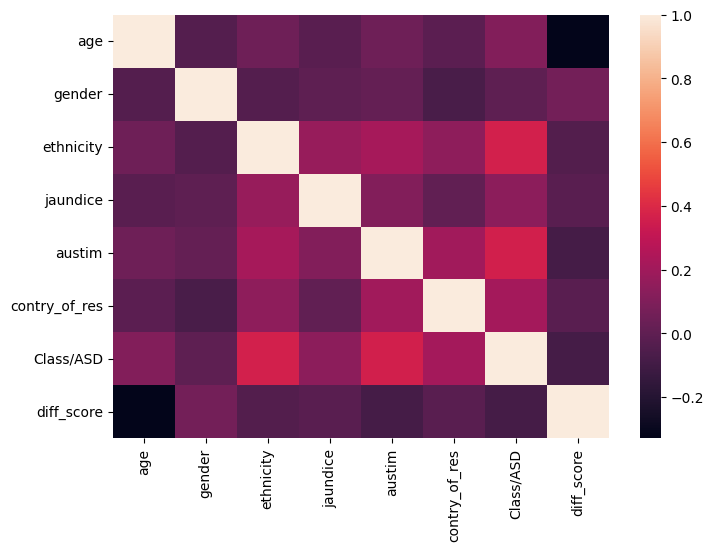

In [30]:
sns.heatmap(new_df.corr())

### Histogram Attributes

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'ethnicity'}>],
       [<AxesSubplot: title={'center': 'jaundice'}>,
        <AxesSubplot: title={'center': 'austim'}>,
        <AxesSubplot: title={'center': 'contry_of_res'}>],
       [<AxesSubplot: title={'center': 'Class/ASD'}>,
        <AxesSubplot: title={'center': 'diff_score'}>, <AxesSubplot: >]],
      dtype=object)

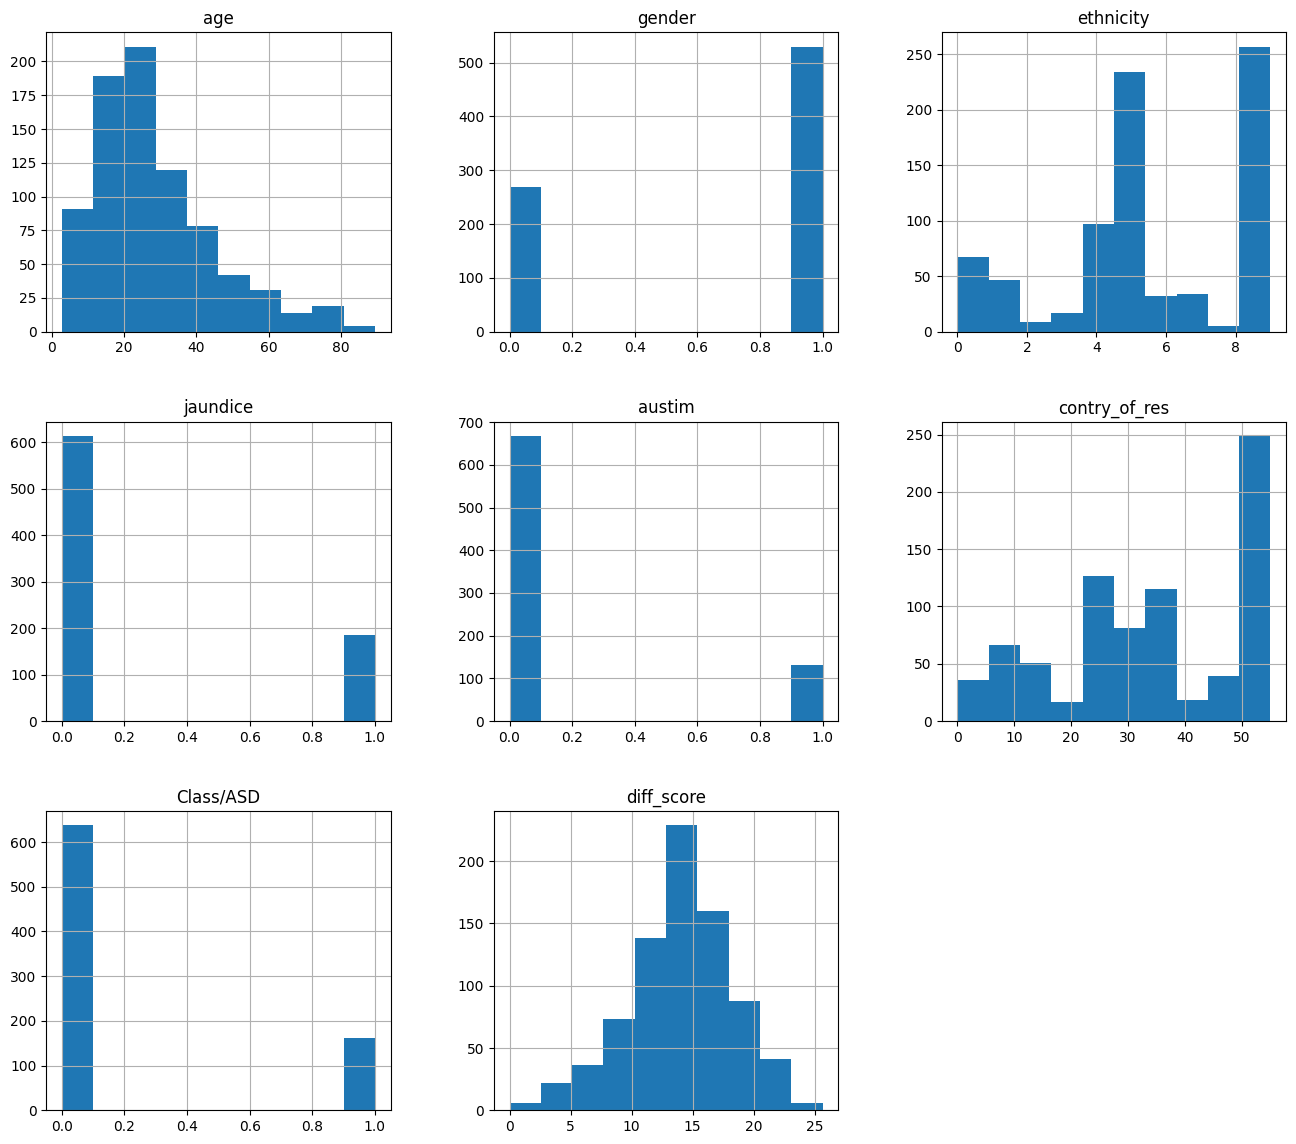

In [31]:
new_df.hist(figsize=(16, 14))

### Training Data Set

In [32]:
# partition: train/test = 80/20
attributes = [col for col in new_df.columns if col != "Class/ASD"]
train_x, test_x, train_y, test_y = train_test_split(new_df[attributes], new_df["Class/ASD"], test_size=0.2, random_state=500)

df_train_x = pd.DataFrame(train_x, columns=new_df.columns)
df_test_x = pd.DataFrame(test_x, columns=new_df.columns)
df_train_y = pd.DataFrame(train_y, columns=["Class/ASD"])
df_test_y = pd.DataFrame(test_y, columns=["Class/ASD"])

print ("shapes")
print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

print 

print ("Class/ASD counts")
print (new_df["Class/ASD"].value_counts())
print (train_y.value_counts())
print (test_y.value_counts())

df_train_x = df_train_x.drop('Class/ASD', axis=1)
df_test_x = df_test_x.drop('Class/ASD', axis=1)
df_train_y = df_train_y.drop('Class/ASD', axis=1)
df_test_y = df_test_y.drop('Class/ASD', axis=1)

shapes
(639, 7)
(160, 7)
(639,)
(160,)
Class/ASD counts
0    638
1    161
Name: Class/ASD, dtype: int64
0    508
1    131
Name: Class/ASD, dtype: int64
0    130
1     30
Name: Class/ASD, dtype: int64


### Modeling

In [33]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred_y = logreg.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.43999999999999995
accuracy:0.825
precision:0.36666666666666664
recall:0.55


c:\Users\juane\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_x, train_y)
pred_y = rfc.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.47058823529411764
accuracy:0.83125
precision:0.4
recall:0.5714285714285714


In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
pred_y = dtc.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.3823529411764707
accuracy:0.7375
precision:0.43333333333333335
recall:0.34210526315789475


In [36]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
pred_y = knn.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5423728813559322
accuracy:0.83125
precision:0.5333333333333333
recall:0.5517241379310345


In [37]:
nbs = MultinomialNB()
nbs.fit(train_x, train_y)
pred_y = nbs.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.523076923076923
accuracy:0.80625
precision:0.5666666666666667
recall:0.4857142857142857


In [38]:
clf = LinearSVC()
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

print ("f1:%" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:%0.27906976744186046
accuracy:0.80625
precision:0.2
recall:0.46153846153846156


c:\Users\juane\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [39]:
gnb = GaussianNB()
gnb.fit(train_x , train_y)
y_pred = gnb.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.27906976744186046
accuracy:0.80625
precision:0.2
recall:0.46153846153846156


### TensorFlow With Keras

In [40]:
attributes = [col for col in new_df.columns if col != "Class/ASD"]
train_x, test_x, train_y, test_y = train_test_split(new_df[attributes], new_df["Class/ASD"], test_size=0.2, random_state=123)
# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=new_df.columns)
df_test_x = pd.DataFrame(test_x, columns=new_df.columns)
df_train_y = pd.DataFrame(train_y, columns=["Class/ASD"])
df_test_y = pd.DataFrame(test_y, columns=["Class/ASD"])

In [41]:
input_dim = train_x.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(5, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(train_x, train_y,
                     epochs = 100,
                     verbose=False,
                     validation_data=(test_x, test_y),
                     batch_size = 5)

In [43]:
history.params

{'verbose': False, 'epochs': 100, 'steps': 128}

In [44]:
history.history

{'loss': [0.6023094058036804,
  0.49703073501586914,
  0.4759436845779419,
  0.4752346873283386,
  0.4800873100757599,
  0.47182199358940125,
  0.4657908082008362,
  0.47008347511291504,
  0.4680961072444916,
  0.45963984727859497,
  0.4589623510837555,
  0.4669630229473114,
  0.4600125551223755,
  0.4544616639614105,
  0.45718321204185486,
  0.46092554926872253,
  0.4577535390853882,
  0.4565582573413849,
  0.45690640807151794,
  0.45273295044898987,
  0.4547451138496399,
  0.4556037187576294,
  0.45434102416038513,
  0.45086178183555603,
  0.4530617296695709,
  0.4486185312271118,
  0.45260050892829895,
  0.4534366726875305,
  0.45280736684799194,
  0.4495566785335541,
  0.45124003291130066,
  0.45167815685272217,
  0.45135006308555603,
  0.4515027105808258,
  0.44982123374938965,
  0.44979238510131836,
  0.45304200053215027,
  0.4497587978839874,
  0.4496946632862091,
  0.4500184655189514,
  0.4467632472515106,
  0.4487583637237549,
  0.44799765944480896,
  0.4527812898159027,
  0.4

In [45]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

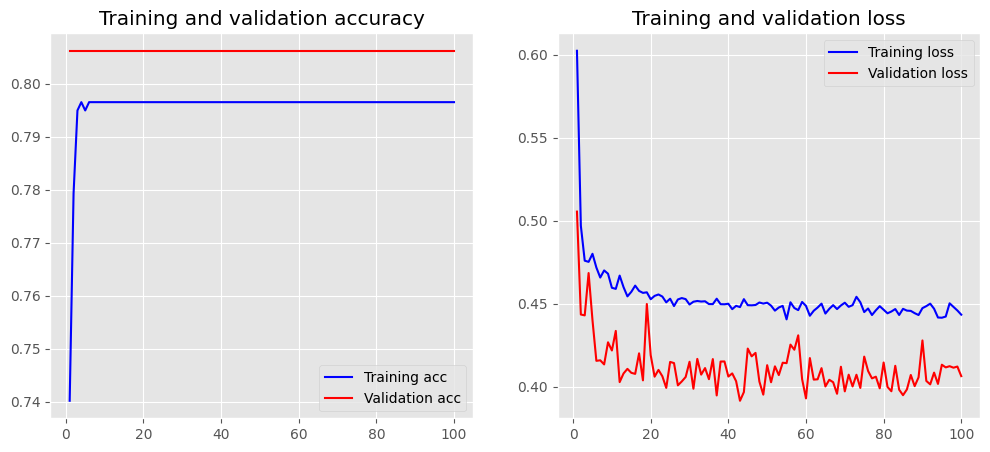

In [46]:
plot_history(history)

In [47]:
loss, accuracy = model.evaluate(train_x, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7966
Testing Accuracy:  0.8062


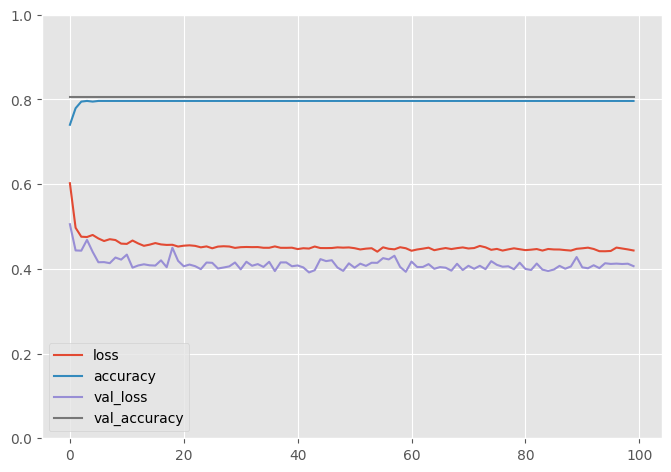

In [48]:
pd.DataFrame(history.history).plot(figsize=(8, 5.5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [49]:
train_x.shape

(639, 7)

In [50]:
train_y.shape

(639,)

In [51]:
X_valid, X_train = train_x[:266], train_x[266:]
y_valid, y_train = train_y[:266], train_y[266:]

In [52]:
history = model.fit(train_x, train_y,
                     epochs = 100,
                     verbose=False,
                     validation_data=(test_x, test_y),
                     batch_size = 5)

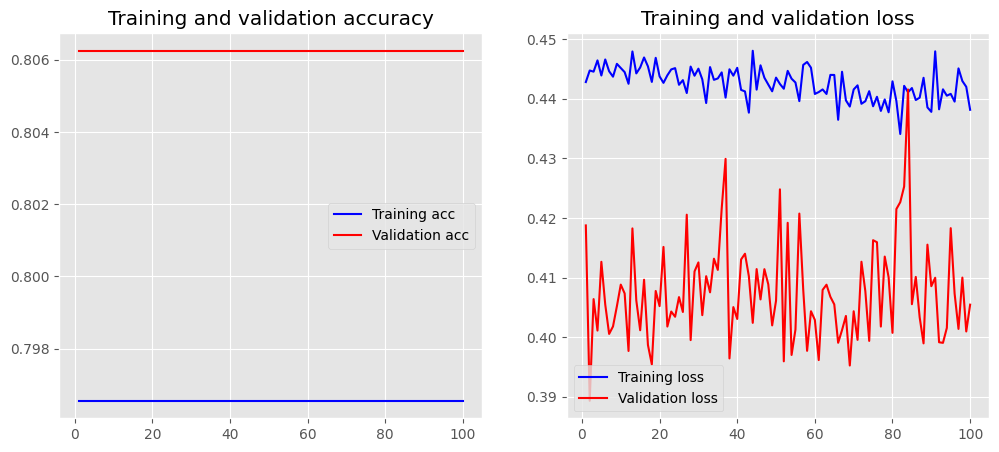

In [53]:
plot_history(history)

In [54]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7989
Testing Accuracy:  0.8062


In [55]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred_y = logreg.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5
accuracy:0.85
precision:0.3870967741935484
recall:0.7058823529411765


In [56]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_x, train_y)
pred_y = rfc.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5
accuracy:0.825
precision:0.45161290322580644
recall:0.56


In [57]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
pred_y = dtc.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5833333333333334
accuracy:0.8125
precision:0.6774193548387096
recall:0.5121951219512195


In [58]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
pred_y = knn.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.6551724137931035
accuracy:0.875
precision:0.6129032258064516
recall:0.7037037037037037


In [59]:
nbs = MultinomialNB()
nbs.fit(train_x, train_y)
pred_y = nbs.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5555555555555556
accuracy:0.85
precision:0.4838709677419355
recall:0.6521739130434783


In [60]:
clf = LinearSVC()
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5625
accuracy:0.7375
precision:0.8709677419354839
recall:0.4153846153846154


c:\Users\juane\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [61]:
gnb = GaussianNB()
gnb.fit(train_x , train_y)
y_pred = gnb.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5625
accuracy:0.7375
precision:0.8709677419354839
recall:0.4153846153846154


### Grid Search

In [62]:
warnings.filterwarnings("ignore")
attributes = [col for col in new_df.columns if col != "Class/ASD"]
skf = StratifiedKFold(n_splits=5, random_state=None)

fold = 0
f1 = []
precision =[]
recall=[]
accuracy=[]
features = []
for train_index, test_index in skf.split(new_df[attributes], new_df["Class/ASD"]):
    fold += 1
    print ("Fold %d" % fold)
    # partition
    train_x, test_x = new_df.iloc[train_index], new_df.iloc[test_index]
    train_y, test_y = new_df["Class/ASD"].iloc[train_index], new_df["Class/ASD"].iloc[test_index]
    
    # vectorize
    X = train_x
    #X_test = vectorizer.transform(test_x)
    X_test = test_x
    
    # convert numpy arrays to data frames
    df_train_x = pd.DataFrame(train_x, columns=new_df.columns)
    df_test_x = pd.DataFrame(test_x, columns=new_df.columns)
    df_train_y = pd.DataFrame(train_y, columns=["Class/ASD"])
    df_test_y = pd.DataFrame(test_y, columns=["Class/ASD"])
    
    #feature selection
    f_val, p_val = chi2(df_train_x, df_train_y["Class/ASD"]) 

    # print the Chi-squared valus and p values
    df_scores = pd.DataFrame(zip(new_df.columns, f_val, p_val), columns=["feature", "chi2", "p"])
    df_scores["chi2"] = df_scores["chi2"].round(2)
    df_scores["p"] = df_scores["p"].round(3)

    # use features with p < 0.05
    sel_ohe_cols = df_scores[df_scores["p"]<0.05]["feature"].values
    
    # train model
    clf = LogisticRegression(random_state=fold)
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
    grid_clf_acc.fit(X[sel_ohe_cols], train_y)
    
    # predict
    pred=grid_clf_acc.predict(X_test[sel_ohe_cols])
    
    # classification results
    for line in metrics.classification_report(test_y, pred).split("\n"):
        print (line)
    f1.append(metrics.f1_score(test_y, pred))
    precision.append(metrics.precision_score(test_y, pred))
    recall.append(metrics.recall_score(test_y, pred))
    accuracy.append(metrics.accuracy_score(test_y, pred))
    
print ("Average F1: %.2f" % np.mean(f1))
print ("Average prcesion: %.2f" % np.mean(precision))
print ("Average recall: %.2f" % np.mean(recall))
print ("Average accuracy: %.2f" % np.mean(accuracy))

Fold 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        32

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

Fold 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        32

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

Fold 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        32

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160